In [ ]:
!apt-get install swig -y
!pip install cython numpy
# !pip install auto-sklearn
!pip install tpot
!pip install scikit-plot


#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import plotly.express as px
import warnings

#Tpot
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from tpot import TPOTClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix, classification_report
from scikitplot.metrics import plot_roc_curve
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  swig4.0
Suggested packages:
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  swig swig4.0
0 upgraded, 2 newly installed, 0 to remove and 16 not upgraded.
Need to get 1,116 kB of archives.
After this operation, 5,542 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig4.0 amd64 4.0.2-1ubuntu1 [1,110 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig all 4.0.2-1ubuntu1 [5,632 B]
Fetched 1,116 kB in 0s (6,967 kB/s)
Selecting previously unselected package swig4.0.
(Reading database ... 120829 files and directories currently installed.)
Preparing to unpack .../swig4.0_4.0.2-1ubuntu1_amd64.deb ...
Unpacking swig4.0 (4.0.2-1ubuntu1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_4.0.2-1ubu

In [ ]:
#Load the data
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('kidney_disease.csv')

#print the first 5 rows
df.head()

Saving kidney_disease.csv to kidney_disease.csv


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
#Get the shape of the data (the no of rows & colms)
df.shape

(400, 26)

In [ ]:
# dropping id column
df.drop('id', axis = 1, inplace = True)

In [ ]:
# rename column names to make it more user-friendly
df.columns = ['age',
                'blood_pressure',
                'specific_gravity',
                'albumin',
                'sugar',
                'red_blood_cells',
                'pus_cell',
                'pus_cell_clumps',
                'bacteria',
                'blood_glucose_random',
                'blood_urea',
                'serum_creatinine',
                'sodium',
                'potassium',
                'haemoglobin',
                'packed_cell_volume',
                'white_blood_cell_count',
                'red_blood_cell_count',
                'hypertension',
                'diabetes_mellitus',
                'coronary_artery_disease',
                'appetite',
                'peda_edema',
                'aanemia',
                'classification'
               ]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [ ]:
# converting necessary columns to numerical type
df['packed_cell_volume']     = pd.to_numeric(df['packed_cell_volume']    , errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count']   = pd.to_numeric(df['red_blood_cell_count']  , errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [ ]:
# Extracting categorical and numerical columns
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [ ]:
# looking at unique values in categorical columns
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

classification has ['ckd' 'ckd\t' 'notckd'] values



In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

In [ ]:
non_numeric_columns = df.select_dtypes(exclude=['int64', 'float64']).columns
df[non_numeric_columns] = df[non_numeric_columns].fillna(df[non_numeric_columns].mode().iloc[0])

In [ ]:
# replace incorrect values
df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)
df['coronary_artery_disease'].replace(to_replace ={'\tno':'no'},inplace=True)
df['classification'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'},inplace=True)

In [ ]:
#converting the values in the 'classification' column of the DataFrame  into numeric format
df['classification'] = df['classification'].map({'ckd': 0, 'not ckd': 1})
df['classification'] = pd.to_numeric(df['classification'], errors='coerce')

In [ ]:
#print unique values present in each of the specified columns
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'classification']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no'] values

coronary_artery_disease has ['no' 'yes'] values

classification has [0 1] values



In [ ]:
# checking for null values
df.isna().sum().sort_values(ascending = False)

age                        0
potassium                  0
aanemia                    0
peda_edema                 0
appetite                   0
coronary_artery_disease    0
diabetes_mellitus          0
hypertension               0
red_blood_cell_count       0
white_blood_cell_count     0
packed_cell_volume         0
haemoglobin                0
sodium                     0
blood_pressure             0
serum_creatinine           0
blood_urea                 0
blood_glucose_random       0
bacteria                   0
pus_cell_clumps            0
pus_cell                   0
red_blood_cells            0
sugar                      0
albumin                    0
specific_gravity           0
classification             0
dtype: int64

In [ ]:
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [ ]:
ind_col = [col for col in df.columns if col != 'classification']
dep_col = 'classification'

X = df[ind_col]
Y = df[dep_col]

In [ ]:
X_encoded = pd.get_dummies(X)

In [ ]:
# splitting data into training and test set
# x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.30, random_state = 50)
x_train, x_test, y_train, y_test = train_test_split(X_encoded, Y, test_size=0.30, random_state=50)


In [ ]:
tpot = TPOTClassifier(generations=10, population_size=40, scoring='accuracy', random_state=30, verbosity=2)
tpot.fit(x_train, y_train)

Optimization Progress:   0%|          | 0/440 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9964285714285716

Generation 2 - Current best internal CV score: 0.9964285714285716

Generation 3 - Current best internal CV score: 1.0

Generation 4 - Current best internal CV score: 1.0

Generation 5 - Current best internal CV score: 1.0

Generation 6 - Current best internal CV score: 1.0

Generation 7 - Current best internal CV score: 1.0

Generation 8 - Current best internal CV score: 1.0

Generation 9 - Current best internal CV score: 1.0

Generation 10 - Current best internal CV score: 1.0

Best pipeline: GaussianNB(GradientBoostingClassifier(input_matrix, learning_rate=0.5, max_depth=3, max_features=0.7000000000000001, min_samples_leaf=16, min_samples_split=18, n_estimators=100, subsample=0.3))


TPOTClassifier(generations=10, population_size=40, random_state=30,
               scoring='accuracy', verbosity=2)

In [ ]:
#Calculates and prints the accuracy of the best pipeline on the test data.
accuracy = tpot.score(x_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.9916666666666667


In [ ]:
#Prints the best pipeline found by TPOT during optimization
best_pipeline = tpot.fitted_pipeline_
print('Best pipeline:', best_pipeline)

Best pipeline: Pipeline(steps=[('stackingestimator',
                 StackingEstimator(estimator=GradientBoostingClassifier(learning_rate=0.5,
                                                                        max_features=0.7000000000000001,
                                                                        min_samples_leaf=16,
                                                                        min_samples_split=18,
                                                                        random_state=30,
                                                                        subsample=0.3))),
                ('gaussiannb', GaussianNB())])


In [ ]:
#Predicts using TPOT model and calculates MSE and RMSE

y_pred=tpot.predict(x_test)
mse =mean_squared_error(y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.008333333333333333
Root Mean Squared Error : 0.09128709291752768


In [ ]:
#Computes and prints test label accuracy using TPOT predictions
accuracy = accuracy_score(y_test, y_pred)
print('Test Label Accuracy :'+str(accuracy))

Test Label Accuracy :0.9916666666666667


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [ ]:
# Initialize the classifier (replace SVC with any other classifier of your choice)
# classifier = SVC()

In [ ]:
# Train the classifier on the training data
# classifier.fit(x_train, y_train)

In [ ]:
# Make predictions on the test data
#y_pred = classifier.predict(x_test)

In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[87  0]
 [ 1 32]]


In [ ]:
# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)

Accuracy: 0.9916666666666667


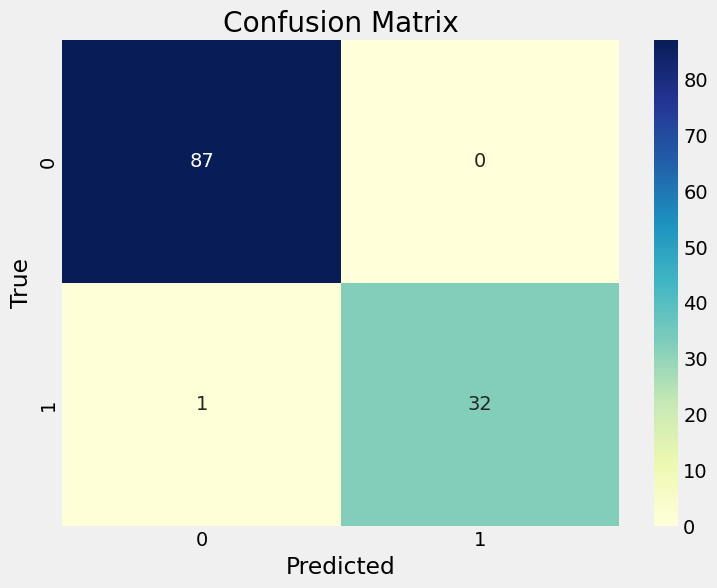

In [ ]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        87
           1       1.00      0.97      0.98        33

    accuracy                           0.99       120
   macro avg       0.99      0.98      0.99       120
weighted avg       0.99      0.99      0.99       120



In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score
# Calculate F1-score, precision, and recall
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Display the metrics
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

F1-score: 0.9846153846153847
Precision: 1.0
Recall: 0.9696969696969697


In [ ]:
x_train.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count',
       'red_blood_cells_abnormal', 'red_blood_cells_normal',
       'pus_cell_abnormal', 'pus_cell_normal', 'pus_cell_clumps_notpresent',
       'pus_cell_clumps_present', 'bacteria_notpresent', 'bacteria_present',
       'hypertension_no', 'hypertension_yes', 'diabetes_mellitus_no',
       'diabetes_mellitus_yes', 'coronary_artery_disease_no',
       'coronary_artery_disease_yes', 'appetite_good', 'appetite_poor',
       'peda_edema_no', 'peda_edema_yes', 'aanemia_no', 'aanemia_yes'],
      dtype='object')

In [ ]:
y_train.columns

AttributeError: ignored

In [ ]:
import joblib

In [ ]:
# Assuming you have a trained model object called tpot
# tpot.fit(x_train, y_train)

# Save the TPOTClassifier model to a pickle file
best_pipeline = tpot.fitted_pipeline_
joblib.dump(best_pipeline, 'tpot_model.pkl')

['tpot_model.pkl']

In [ ]:
# Save only the best pipeline to a file
best_pipeline = tpot.fitted_pipeline_
joblib.dump(best_pipeline, 'tpot_model.pkl')

['tpot_model.pkl']

In [ ]:
import joblib
import numpy as np

# Load the model
model = joblib.load("tpot_model.pkl")

# Input data as a 1D array (single sample with multiple features)
input_data = np.array([123, 2311, 121, 23, 432, 45, 21, 21, 545, 445, 34, 211, 21, 23, 43, 43, 21, 213, 43, 54, 45, 21, 21, 234, 43, 121,223,332,443,523,632,743,843,934])

# Reshape the input data to be a 2D array with one row
input_data_2d = input_data.reshape(1, -1)
print(input_data_2d)

# Make predictions
predictions = model.predict(input_data_2d)

print(predictions)

# Now, predictions should contain the model's predictions


[[ 123 2311  121   23  432   45   21   21  545  445   34  211   21   23
    43   43   21  213   43   54   45   21   21  234   43  121  223  332
   443  523  632  743  843  934]]
[0]
